In [1]:
#! /usr/bin/env python

from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
prefix='piff' #'psfex'

#reserve stars catalogue with Piff solutions
data = fitsio.read('/global/homes/m/mjarvis/desdata/users/mjarvis/y3a1-v29/psf_y3a1-v29.fits')
h = fitsio.read_header('/global/homes/m/mjarvis/desdata/users/mjarvis/y3a1-v29/psf_y3a1-v29.fits')
band=data['band']
print(np.shape(data))
data=data[np.where((band == 'r') | (band == 'i') | (band == 'z') )] #| (band == 'g')) ]

data = data[data['ra'].argsort()]#[:10000]
rastarcat = data['ra']
decstarcat = data['dec'] 
rastarcat[rastarcat > 180] -= 360


(56707987,)


In [3]:
#real stars with their magnnitudes to match
catname = '/project/projectdirs/des/www/y3_cats/Y3_mastercat_03_31_20.h5'

import h5py
f = h5py.File(catname,'r')
print(f['catalog'].keys())
print(f['catalog/gold'].keys())

#FLAGS_GOLD  If you are using SExtractor quantities, you should add (FLAGS_GOLD & 1111000) = 0 (which means it can be either 0,1,2 or 3) ; and (FLAGS_BADREGIONS & 01) = 0
gflag = np.array(f['catalog/gold/flags_gold'])
badflag =  np.array(f['catalog/gold/flags_badregions'])
footflag=np.array(f['catalog/gold/flags_footprint'])
foreflag=np.array(f['catalog/gold/flags_foreground'])
#star_mask = np.array((f['catalog/gold/flags_gold'] == 0 ) and (f['catalog/gold/flags_gold/flags_badregions'] == 0))
          
              
print("orig length",len(np.array(f['catalog/gold/ra']))) #399263026
ra = np.array(f['catalog/gold/ra'])#[star_mask] 
dec = np.array(f['catalog/gold/dec'])

def flux2mag(flux, zero_pt=30):
    return zero_pt - 2.5 * np.log10(flux)

zeropt=30
r = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_r']))#[star_mask]
i = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_i']))#[star_mask]
z = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_z']))#[star_mask]
g = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_g']))#[star_mask]

ra[ra > 180] -= 360
goodgals=np.where((badflag==0) & (gflag<4) & (footflag == 1 ) & (foreflag == 0))
ra=ra[goodgals]
print("no bad stars length",len(ra))

print(gflag)
dec=dec[goodgals] 
g=g[goodgals] 
r=r[goodgals] 
i=i[goodgals] 
z=z[goodgals] 

gold=np.column_stack((ra,dec,r,i,z,g))

print("no bad stars length",np.shape(gold))
gold=gold[np.where((r<30) & (r>0) & (i<30) & (i>0) & (z<30) & (z>0) )]
print("reasonable riz length",np.shape(gold))

goldra=gold[:,0]
golddec=gold[:,1]
goldr=gold[:,2]
goldi=gold[:,3]
goldz=gold[:,4]
goldg=gold[:,5]

[u'metacal', u'gold', u'bpz', u'dnf', u'redmagic', u'redmapper', u'maglim', u'sompz']
[u'a_sed_sfd98_g', u'a_sed_sfd98_i', u'a_sed_sfd98_r', u'a_sed_sfd98_z', u'coadd_object_id', u'dec', u'delta_mag_chrom_g', u'delta_mag_chrom_i', u'delta_mag_chrom_r', u'delta_mag_chrom_z', u'delta_mag_y4_g', u'delta_mag_y4_i', u'delta_mag_y4_r', u'delta_mag_y4_z', u'ebv_sfd98', u'extended_class_mash_sof', u'flags', u'flags_badregions', u'flags_footprint', u'flags_foreground', u'flags_gold', u'flags_phot', u'hpix_16384', u'n_images_g', u'n_images_i', u'n_images_r', u'n_images_z', u'ra', u'sextractor_flags_g', u'sextractor_flags_i', u'sextractor_flags_r', u'sextractor_flags_z', u'sof_cm_flux_corrected_g', u'sof_cm_flux_corrected_i', u'sof_cm_flux_corrected_r', u'sof_cm_flux_corrected_z', u'sof_cm_flux_err_g', u'sof_cm_flux_err_i', u'sof_cm_flux_err_r', u'sof_cm_flux_err_z', u'sof_cm_mag_corrected_g', u'sof_cm_mag_corrected_i', u'sof_cm_mag_corrected_r', u'sof_cm_mag_corrected_z', u'sof_cm_mag_err_g', u'

/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in l

no bad stars length 331306800
[ 0  3  0 ..., 23 23 23]
no bad stars length (331306800, 6)


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater


reasonable riz length (326500332, 6)


[u'R11', u'R12', u'R21', u'R22', u'T', u'T_err', u'coadd_object_id', u'covmat_0_1', u'covmat_1_1', u'covmat_2_2', u'dec', u'e_1', u'e_2', u'flags', u'flux_err_i', u'flux_err_r', u'flux_err_z', u'flux_i', u'flux_r', u'flux_z', u'mask_frac', u'mcal_psf_T', u'mcal_psf_e1', u'mcal_psf_e2', u'nimage_tot_i', u'nimage_tot_r', u'nimage_tot_z', u'nimage_use_i', u'nimage_use_r', u'nimage_use_z', u'psf_T', u'psf_e1', u'psf_e2', u'ra', u'size_ratio', u'snr', u'weight']
mean:  0.778988460067
20th:  0.36765894126
80th:  1.16654240452


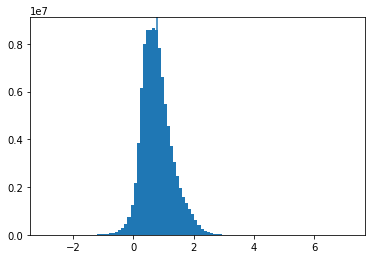

In [4]:
flux_tables = ['metacal/unsheared', 'metacal/sheared_1p', 'metacal/sheared_1m', 'metacal/sheared_2p', 'metacal/sheared_2m'] 
select_metacal  = f['index']['select'] # this is the master catalog

print(f['catalog/metacal/unsheared'].keys())
rselect=np.array(f['catalog/{}/flux_r'.format(flux_tables[0])][:])[select_metacal]
zselect=np.array(f['catalog/{}/flux_z'.format(flux_tables[0])][:])[select_metacal]

def flux2mag(flux, zero_pt=30):
    return zero_pt - 2.5 * np.log10(flux)

rzselect=flux2mag(rselect)-flux2mag(zselect)

p20=np.percentile(rzselect,20)
p80=np.percentile(rzselect,80)

print("mean: ", np.mean(rzselect))
print("20th: ", np.percentile(rzselect,20))
print("80th: ", np.percentile(rzselect,80))
plt.hist(rzselect,100)
plt.axvline(np.mean(rzselect))


median:  0.72179320546
20th:  0.36765894126
80th:  1.16654240452


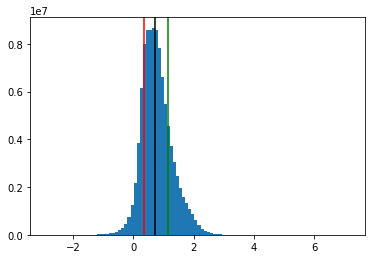

In [14]:
print("median: ", np.median(rzselect))
print("20th: ", np.percentile(rzselect,20))
print("80th: ", np.percentile(rzselect,80))

med=np.median(rzselect)
p20=np.percentile(rzselect,20)
p80=np.percentile(rzselect,80)
plt.hist(rzselect,100)
plt.axvline(med,color='black')
plt.axvline(p20,color='red')
plt.axvline(p80,color='green')

#    ax.axvline(x=0.78, linewidth=2, color='grey',label=r"$\rm{median}$")
#    ax.axvline(x=-0.66, linewidth=2, color='grey',linestyle='--',label=r'$\rm{20th \, percentile}$')
#    ax.axvline(x=2.24, linewidth=2, color='grey',linestyle=':',label=r'$\rm{80th \, percentile}$')


In [5]:
from astropy.coordinates import SkyCoord
from astropy import units as u

goldcat = SkyCoord(ra=goldra*u.degree, dec=golddec*u.degree)  
catalog = SkyCoord(ra=rastarcat*u.degree, dec=decstarcat*u.degree)  
idx, d2d, d3d = catalog.match_to_catalog_sky(goldcat, nthneighbor=1) 

27658421


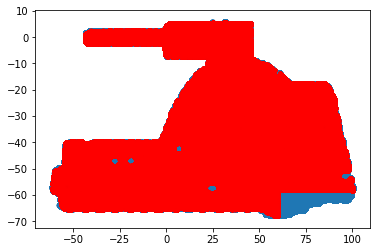

In [6]:
matchlim=1*u.arcsecond
print(len(d2d[d2d < matchlim]))  
plt.scatter(rastarcat[np.where(d2d >matchlim)],decstarcat[np.where(d2d > matchlim)], marker='.')
plt.scatter(rastarcat[np.where(d2d < matchlim)],decstarcat[np.where(d2d < matchlim)], marker='.', color="red", alpha=0.5)

In [7]:
#i've matched psfres for r i and z. now I want to only take one band at a time.
thisdata=data[np.where(d2d < matchlim)]

thisgoldi=goldi[idx][np.where(d2d < matchlim)]
thisgoldr=goldr[idx][np.where(d2d < matchlim)]
thisgoldg=goldg[idx][np.where(d2d < matchlim)]
thisgoldz=goldz[idx][np.where(d2d < matchlim)]
thismag=thisdata['mag']
print(len(thisdata))
print(len(thisgoldi))

print(thisdata['band'])
thisband=thisdata['band']
print(np.shape(thisdata))
rband=thisdata[np.where(thisband=="r")]
print("r ", np.shape(rband))
iband=thisdata[np.where(thisband=="i")]
print("i ", np.shape(iband))
zband=thisdata[np.where(thisband=="z")]
print("z ", np.shape(zband)) 
gband=thisdata[np.where(thisband=="g")]
print("g ", np.shape(gband)) 

27658421
27658421
['z' 'r' 'i' ..., 'z' 'r' 'i']
(27658421,)
r  (7048025,)
i  (9951448,)
z  (10658948,)
g  (0,)


In [8]:
def compute_res(d):

    de1 =  d['obs_e1']-d[prefix+'_e1']
    de2 =  d['obs_e2']-d[prefix+'_e2']
    dt =  (d['obs_T']-d[prefix+'_T'])
    dtfrac = dt/d['obs_T']
    print('mean de = ',np.mean(de1),np.mean(de2))
    print('mean dt = ',np.mean(dt))

    return dtfrac, dt,  de1, de2

fracsizeres, sizeres, e1res, e2res=compute_res(thisdata)

mean de =  3.35058945231e-05 -4.8042184e-05
mean dt =  -0.000216052335892


[0.0033189165342139785, 0.0016939151762819984, 0.001268971854168448, 0.0013426282818279202, 0.00099403133400817359, 0.00060270326565780804, 0.00043232486616046691, 0.00010635557167054285, 8.9326662963397848e-05, 0.00010075591173522366, 0.00011694284265806729, 0.00012863612993131089, 0.00013156797886897106, 0.00013150791312124962, 0.00013386997052952095, 0.00013541954177217515, 0.00013602839401879522, 0.00013415907268137252, 0.00012985922548648088, 0.00012362663618817186, 0.00011806390745689454, 0.00011396560965340768, 0.00011175933711513604, 0.00011226971241103594, 0.0001173690250646661, 0.00012783720940288306, 0.00014601959757733202, 0.00017083043662722194, 0.00020580373109571189, 0.00024484512386711767]
[0.40356342019173813, 0.40067499060628708, 0.39481586103742422, 0.3958759844767481, 0.39519145461894112, 0.3937682644562962, 0.39420865675817024, 0.38865568696649494, 0.38857049456710502, 0.38741834089247029, 0.38684819442940643, 0.38579138159649989, 0.38373101250494557, 0.38202097999

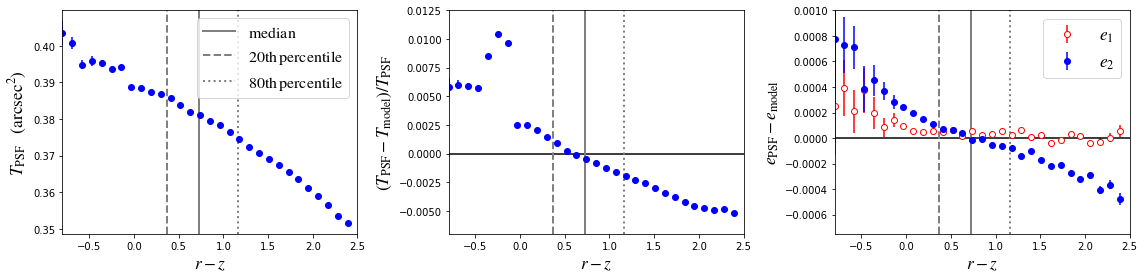

In [35]:
#want psf vs colour:  #r-i with r or i band psfs and i-z for x-psf
def bin_by_col2(m, T, dTfrac, de1, de2, min_mused,band):
    min_mag = -0.8 #min(m)
    max_mag = 2.5 #max(m)   
    mag_bins = np.linspace(min_mag, max_mag,31)

    index = np.digitize(m, mag_bins)
    bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
    bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
    bin_T = [T[index == i].mean() for i in range(1, len(mag_bins))]
    bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
    bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
                    for i in range(1, len(mag_bins)) ]
    bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
                    for i in range(1, len(mag_bins)) ]
    bin_T_err = [ np.sqrt(T[index == i].var() / len(T[index == i]))
                    for i in range(1, len(mag_bins)) ]
    bin_dTfrac_err = [ np.sqrt(dTfrac[index == i].var() / len(dTfrac[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print(bin_T_err)
    print(bin_T)
    print(len(bin_T_err))
    print(len(bin_T))
#
    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_de1[i-1] = 0.
            bin_de2[i-1] = 0.
            #bin_dT[i-1] = 0.
            bin_dTfrac[i-1] = 0.
            bin_de1_err[i-1] = 0.
            bin_de2_err[i-1] = 0.
            #bin_dT_err[i-1] = 0.
            bin_dTfrac_err[i-1] = 0.
            
            
    fit = np.polyfit(mag_bins[:-1], bin_dTfrac, 3)
    fit_fn = np.poly1d(fit) 
    # fit_fn is now a function which takes in x and returns an estimate for y
    

    fig, axes = plt.subplots(1,3)
    
    ax = axes[0]
    #ax.set_ylim(-0.002,0.002)
    #ax.plot([min_mag-0.1,max_mag], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_T, yerr=bin_T_err, color='blue', fmt='o')
    ax.axvline(x=med, linewidth=2, color='grey',label=r"$\rm{median}$")
    ax.axvline(x=p20, linewidth=2, color='grey',linestyle='--',label=r'$\rm{20th \, percentile}$')
    ax.axvline(x=p80, linewidth=2, color='grey',linestyle=':',label=r'$\rm{80th \, percentile}$')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$T_{\rm PSF}\quad({\rm arcsec}^2)$', fontsize='xx-large')
    ax.set_xlim(min_mag,max_mag)
    #ax.set_title(r'$riz-{\rm band \, PSF}$', fontsize='x-large' )
    ax.legend(prop={'size': 16},loc='upper right')
    ax.set_xlabel(r'$r-z$', fontsize='xx-large' )

    ax = axes[1]
    #ax.set_ylim(-0.002,0.002)
    ax.plot([min_mag-0.1,max_mag], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, color='blue', fmt='o')
    #ax.plot(mag_bins[:-1], fit_fn(mag_bins[:-1]), '--k')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.axvline(x=med, linewidth=2, color='grey')
    ax.axvline(x=p20, linewidth=2, color='grey',linestyle='--')
    ax.axvline(x=p80, linewidth=2, color='grey',linestyle=':')
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$', fontsize='xx-large')
    ax.set_xlim(min_mag,max_mag)
    ax.set_ylim(-0.007,0.0125)
    ax.set_xlabel(r'$r-z$', fontsize='xx-large' )
    #ax.set_xlim(min_mag, max_mag)

    ax = axes[2]
    #ax.set_ylim(-3.e-4,4.e-4)
    ax.plot([min_mag-0.1,max_mag+0.1], [0,0], color='black')
    #ax.plot([-0.5,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,mi1_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    e1_line = ax.errorbar(mag_bins[:-1], bin_de1, yerr=bin_de1_err,  color='red', fmt='o', mfc='white')
    e2_line = ax.errorbar(mag_bins[:-1], bin_de2, yerr=bin_de2_err, color='blue', fmt='o')
    #ax.axhline(y=0.0002, linewidth=4, color='grey')
    #ax.axhline(y=-0.0002, linewidth=4, color='grey')
    ax.axvline(x=med, linewidth=2, color='grey')  #0.78
    ax.axvline(x=p20, linewidth=2, color='grey',linestyle='--')  #-0.66
    ax.axvline(x=p80, linewidth=2, color='grey',linestyle=':')  #2.24
    ax.legend([e1_line, e2_line], [r'$e_1$', r'$e_2$'], loc='upper right', fontsize='xx-large')
    ax.set_ylabel(r'$e_{\rm PSF} - e_{\rm model}$', fontsize='xx-large')
    ax.set_ylim(-0.00075,0.001)
    ax.set_xlim(min_mag,max_mag)
    #ax.set_xlim(min_mag,max_mag)
    ax.set_xlabel(r'$r-z$', fontsize='xx-large' )
    
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    plt.rcParams["font.family"] = "Times New Roman"
    
    plt.rcParams['mathtext.fontset'] = 'stix'

    fig.set_size_inches(16.0,4.0)
    plt.tight_layout()
    plt.savefig('dpsf_colour_r-z_%sPSF.pdf' %(band))
    plt.show()
    
bin_by_col2(thisgoldr-thisgoldz, thisdata['obs_T'], fracsizeres, e1res, e2res, 15,"r") 

In [34]:
print(len(thisgoldr-thisgoldz), len(thisdata['obs_T']))
print(len( fracsizeres),len( e1res), len(e2res))

import pickle

# write python dict to a file
mydict = {'a': thisgoldr, 'b': thisgoldz, 'c': thisdata,'fracsizeres': fracsizeres,'e1res': e1res,'e2res': e2res}
output = open('myfile.pkl', 'wb')
pickle.dump(mydict, output)
output.close()

27658421 27658421
27658421 27658421 27658421


In [ ]:
#FOR THE PIFF PAPER - BF WITH COLOUR SPLITS

In [ ]:
#bin in colour
rz=thisgoldr-thisgoldz
print(max(rz))
lo=thisdata[np.where((rz<0.05) & (rz>-0.5))]   #0.1-0.25
rlo=thisgoldr[np.where((rz<0.05) & (rz>-0.5))] 
zlo=thisgoldz[np.where((rz<0.05) & (rz>-0.5))] 
med=thisdata[np.where((rz>0.85) & (rz<1))]   #0.85-1
rmed=thisgoldr[np.where((rz>0.85) & (rz<1))] 
zmed=thisgoldz[np.where((rz>0.85) & (rz<1))] 
hi=thisdata[np.where((rz>1.85) & (rz<2))]  #1.85-2
rhi=thisgoldr[np.where((rz>1.85) & (rz<2))] 
zhi=thisgoldz[np.where((rz>1.85) & (rz<2))] 
print(hi)
print(len(lo),len(med),len(hi))

In [ ]:
fracsizeres, sizeres, e1res, e2res=compute_res(lo)
mag_bins, lobin_dT, lobin_dT_err, lobin_dTfrac, lobin_dTfrac_err, lobin_de1, lobin_de1_err, lobin_de2, lobin_de2_err=bin_by_mag(lo['mag'], sizeres, fracsizeres, e1res, e2res, 16.5,"r-z=0.1-0.25,  i")

fracsizeres, sizeres, e1res, e2res=compute_res(med)
mag_bins, medbin_dT, medbin_dT_err, medbin_dTfrac, medbin_dTfrac_err, medbin_de1, medbin_de1_err, medbin_de2, medbin_de2_err= bin_by_mag(med['mag'], sizeres, fracsizeres, e1res, e2res, 16.5,"r-z=0.85-1, i")

fracsizeres, sizeres, e1res, e2res=compute_res(hi)
mag_bins, hibin_dT, hibin_dT_err, hibin_dTfrac, hibin_dTfrac_err, hibin_de1, hibin_de1_err, hibin_de2, hibin_de2_err=bin_by_mag(hi['mag'], sizeres, fracsizeres, e1res, e2res, 16.5,"r-z=1.85-2,  i")

fracsizeres, sizeres, e1res, e2res=compute_res(data)
mag_bins,bin_dT, bin_dT_err, bin_dTfrac, bin_dTfrac_err, bin_de1, bin_de1_err, bin_de2, bin_de2_err= bin_by_mag(data['mag'], sizeres, fracsizeres, e1res, e2res, 16.5,"all i")

fig, axes = plt.subplots(4,1, sharex=True)
min_mag=15
max_mag=21
min_mused=16.5

ax = axes[0]
ax.set_ylim(-0.003,0.003)
#ax.set_title('%s' % band)
ax.set_title(r'$riz-\rm{band}$',fontsize='x-large')
ax.plot([min_mag,max_mag], [0,0], color='black')
#ax.plot([min_mused,min_mused],[-1,1], color='Grey')
ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)

t_linelo = ax.errorbar(mag_bins[:-1], lobin_dT, yerr=lobin_dT_err, color='darkturquoise', fmt='x',label=r"$r-z$ = -0.5 - 0.05")
t_linemed = ax.errorbar(mag_bins[:-1], medbin_dT, yerr=medbin_dT_err, color='orange', fmt='*',label=r"$r-z$ = 0.85 - 1")
t_linehi = ax.errorbar(mag_bins[:-1], hibin_dT, yerr=hibin_dT_err, color='magenta', fmt='.',label=r"$r-z$ = 1.85 - 2")
t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='black', fmt='o',label="all")
#ax.plot(mag_bins[:-1], fit_fn(mag_bins[:-1]), '--k')
#ax.fill( [18.3,18.3,max_mag,max_mag], [0.003,-0.001,-0.001,0.003], fill=True, color='yellow',alpha=0.3)
ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$', fontsize='x-large')
ax.legend(loc='lower left')

ax = axes[1]
#ax.set_ylim(-0.0025,0.0025)
ax.set_ylim(-0.01,0.01)
ax.plot([min_mag,max_mag], [0,0], color='black')
#ax.plot([min_mused,min_mused],[-1,1], color='Grey')
ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)

t_linelo = ax.errorbar(mag_bins[:-1], lobin_dTfrac, yerr=lobin_dTfrac_err, color='darkturquoise', fmt='x',label="-0.5 - 0.05")
t_linemed = ax.errorbar(mag_bins[:-1], medbin_dTfrac, yerr=medbin_dTfrac_err, color='orange', fmt='*',label="r-z=0.85 - 1")
t_linehi = ax.errorbar(mag_bins[:-1], hibin_dTfrac, yerr=hibin_dTfrac_err, color='magenta', fmt='.',label="r-z=1.85 - 2")
t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, color='black', fmt='o')
#ax.legend([t_line], [r'$\delta T$'])
ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$', fontsize='x-large')

ax = axes[2]
#ax.set_ylim(-3.e-4,3.e-4)
ax.set_ylim(-5.e-4,5.e-4)
ax.plot([min_mag,max_mag], [0,0], color='black')
#ax.plot([min_mused,min_mused],[-1,1], color='Grey')
ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
e1_linelo = ax.errorbar(mag_bins[:-1], lobin_de1, yerr=lobin_de1_err, color='darkturquoise', fmt='x')
#e1_linelo = ax.errorbar(mag_bins[:-1], lobin_de1, yerr=lobin_de1_err, color='magenta', fmt='o')
#e2_linelo = ax.errorbar(mag_bins[:-1], lobin_de2, yerr=lobin_de2_err, color='magenta', fmt='x')

e1_linemed = ax.errorbar(mag_bins[:-1], medbin_de1, yerr=medbin_de1_err, color='orange', fmt='*')
#e2_linemed= ax.errorbar(mag_bins[:-1], medbin_de2, yerr=medbin_de2_err, color='orange', fmt='x')

e1_linehi = ax.errorbar(mag_bins[:-1], hibin_de1, yerr=hibin_de1_err, color='magenta', fmt='.')
#e2_linehi = ax.errorbar(mag_bins[:-1], hibin_de2, yerr=hibin_de2_err, color='darkturquoise', fmt='x')

e1_line = ax.errorbar(mag_bins[:-1], bin_de1, yerr=bin_de1_err, color='black', fmt='o')

#ax.axhline(y=0.0002, linewidth=4, color='grey')
#ax.axhline(y=-0.0002, linewidth=4, color='grey')
#ax.fill( [18.3,18.3,max_mag,max_mag], [0.0002,-0.0002,-0.0002,0.0002], fill=True, color='yellow',alpha=0.3)
#ax.legend([e1_linelo, e2_linelo], [r'$e_1$', r'$e_2$'], fontsize='x-large')
ax.set_ylabel(r'$e_{\rm PSF}^1 - e_{\rm model}^1$', fontsize='x-large')

ax.set_xlim(min_mag,max_mag)
#ax.set_xlabel('Magnitude', fontsize='x-large')

ax = axes[3]
#ax.set_ylim(-3.e-4,3.e-4)
ax.set_ylim(-5.e-4,5.e-4)
ax.plot([min_mag,max_mag], [0,0], color='black')
#ax.plot([min_mused,min_mused],[-1,1], color='Grey')
ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
#e1_linelo = ax.errorbar(mag_bins[:-1], lobin_de1, yerr=lobin_de1_err, color='magenta', fmt='o')
e2_linelo = ax.errorbar(mag_bins[:-1], lobin_de2, yerr=lobin_de2_err, color='darkturquoise', fmt='x')

#e1_linemed = ax.errorbar(mag_bins[:-1], medbin_de1, yerr=medbin_de1_err, color='orange', fmt='o')
e2_linemed= ax.errorbar(mag_bins[:-1], medbin_de2, yerr=medbin_de2_err, color='orange', fmt='*')

#e1_linehi = ax.errorbar(mag_bins[:-1], hibin_de1, yerr=hibin_de1_err, color='darkturquoise', fmt='o')
e2_linehi = ax.errorbar(mag_bins[:-1], hibin_de2, yerr=hibin_de2_err, color='magenta', fmt='.')

e2_line = ax.errorbar(mag_bins[:-1], bin_de2, yerr=bin_de2_err, color='black', fmt='o')

#ax.axhline(y=0.0002, linewidth=4, color='grey')
#ax.axhline(y=-0.0002, linewidth=4, color='grey')
#ax.fill( [18.3,18.3,max_mag,max_mag], [0.0002,-0.0002,-0.0002,0.0002], fill=True, color='yellow',alpha=0.3)
#ax.legend([e1_linelo, e2_linelo], [r'$e_1$', r'$e_2$'], fontsize='x-large')
ax.set_ylabel(r'$e_{\rm PSF}^2 - e_{\rm model}^2$', fontsize='x-large')

ax.set_xlim(min_mag,max_mag)
ax.set_xlabel(r'$\rm{Magnitude}$', fontsize='x-large')

#plt.hist(meddt["Ks"], 30,range=(-0.004,0.002),color="purple",label="Ks",histtype='step')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'



fig.set_size_inches(7.0,12.0)
plt.tight_layout()
plt.savefig('dpsf_mag_colsplits.pdf')
plt.show()

print(mag_bins[:-1], lobin_de2)